In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

covid_data = "Resources/CovidNumbers.csv"
March_2019_turnstile = "Resources/Turnstile_190330.csv"
March_2020_turnstile = "Resources/Turnstile_200328.csv"
June_2019_turnstile = "Resources/Turnstile_190629.csv"
June_2020_turnstile = "Resources/Turnstile_200627.csv"

In [2]:
#data-by-modzcta.csv
#This file contains data by modified ZIP code tabulation areas (ZCTA). 
#This unit of geography is similar to ZIP codes but combines census blocks with smaller populations to allow more stable estimates of population size for rate calculation. 
#Please see description of modified ZCTAs in the technical notes section (Geography: Zip codes and ZCTAs).
#data as of 9/25/20

covid_pd = pd.read_csv(covid_data, header = 8)

covid_pd.head()

,\outl0\strokewidth0 \strokec2 MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS\
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,459.0,1947.97,23563.03,27.0,114.59,5.53,8299\
1,10002,Chinatown/Lower East Side,Manhattan,1371.0,1786.19,76755.41,161.0,209.76,6.61,20729\
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,584.0,1085.47,53801.62,35.0,65.05,3.07,19041\
3,10004,Financial District,Manhattan,45.0,1232.67,3650.61,1.0,27.39,4.43,1015\
4,10005,Financial District,Manhattan,109.0,1298.22,8396.11,2.0,23.82,4.24,2569\


In [3]:
#rename the column
covid_clean_df = covid_pd.rename(columns = {"\outl0\strokewidth0 \strokec2 MODIFIED_ZCTA": "Modified_ZCTA"})
covid_clean_df.head()

,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS\
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,459.0,1947.97,23563.03,27.0,114.59,5.53,8299\
1,10002,Chinatown/Lower East Side,Manhattan,1371.0,1786.19,76755.41,161.0,209.76,6.61,20729\
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,584.0,1085.47,53801.62,35.0,65.05,3.07,19041\
3,10004,Financial District,Manhattan,45.0,1232.67,3650.61,1.0,27.39,4.43,1015\
4,10005,Financial District,Manhattan,109.0,1298.22,8396.11,2.0,23.82,4.24,2569\


In [4]:
#covid case rate
columns_to_extract = ["Modified_ZCTA", "NEIGHBORHOOD_NAME", "BOROUGH_GROUP", "COVID_CASE_RATE"]
covid_case_rate = pd.DataFrame(covid_clean_df, columns = columns_to_extract)

covid_case_rate.shape

(178, 4)

In [5]:
covid_case_rate.head()

,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,1947.97
1,10002,Chinatown/Lower East Side,Manhattan,1786.19
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,1085.47
3,10004,Financial District,Manhattan,1232.67
4,10005,Financial District,Manhattan,1298.22


In [6]:
covid_case_rate = covid_case_rate.sort_values(by=["COVID_CASE_RATE"], ascending = False)

covid_case_rate.head()

,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
140,11369,Airport/East Elmhurst,Queens,4837.88
125,11239,East New York,Brooklyn,4688.49
139,11368,Corona/North Corona,Queens,4627.48
74,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,4602.27
142,11372,Jackson Heights,Queens,4561.81


In [7]:
covid_case_max = covid_case_rate.nlargest(5, "COVID_CASE_RATE")

print(covid_case_max.shape)

covid_case_max.head()

(5, 4)


,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
140,11369,Airport/East Elmhurst,Queens,4837.88
125,11239,East New York,Brooklyn,4688.49
139,11368,Corona/North Corona,Queens,4627.48
74,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,4602.27
142,11372,Jackson Heights,Queens,4561.81


In [8]:
covid_case_min = covid_case_rate.nsmallest(5, "COVID_CASE_RATE")
print(covid_case_min.shape)

covid_case_min.head()

(5, 4)


,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
42,10280,Battery Park City,Manhattan,675.77
6,10007,TriBeCa,Manhattan,933.36
10,10012,Greenwich Village/SoHo,Manhattan,1000.78
102,11215,Gowanus/Park Slope/Windsor Terrace,Brooklyn,1042.44
14,10017,East Midtown/Murray Hill,Manhattan,1066.52


In [9]:
march_2019_data = pd.read_csv(March_2019_turnstile, header = 9)
march_2019_data.head()

,\outl0\strokewidth0 \strokec2 C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,0:00:00,REGULAR,6989774.0,2370411.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,4:00:00,REGULAR,6989795.0,2370413.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,8:00:00,REGULAR,6989813.0,2370436.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,12:00:00,REGULAR,6989924.0,2370512.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,16:00:00,REGULAR,6990200.0,2370573.0


In [10]:
march_2020_data = pd.read_csv(March_2020_turnstile, header = 9)
march_2020_data.head()

,\outl0\strokewidth0 \strokec2 C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,0:00:00,REGULAR,7411940.0,2515962.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,4:00:00,REGULAR,7411942.0,2515966.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,8:00:00,REGULAR,7411945.0,2515979.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,12:00:00,REGULAR,7411969.0,2516000.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,16:00:00,REGULAR,7412028.0,2516024.0


In [11]:
march_2019_data.columns
mar_2019 = march_2019_data.columns[-1]
march_2019_data = march_2019_data.rename(columns = {mar_2019: "EXIT"})
columns_to_use = ['SCP', 'STATION','LINENAME', 'DATE', 'TIME', 'DESC', 'ENTRIES','EXIT']
march_2019_df = pd.DataFrame(march_2019_data, columns = columns_to_use)

march_2019_df.head()

,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXIT
0,02-00-00,59 ST,NQR456W,3/23/19,0:00:00,REGULAR,6989774.0,2370411.0
1,02-00-00,59 ST,NQR456W,3/23/19,4:00:00,REGULAR,6989795.0,2370413.0
2,02-00-00,59 ST,NQR456W,3/23/19,8:00:00,REGULAR,6989813.0,2370436.0
3,02-00-00,59 ST,NQR456W,3/23/19,12:00:00,REGULAR,6989924.0,2370512.0
4,02-00-00,59 ST,NQR456W,3/23/19,16:00:00,REGULAR,6990200.0,2370573.0


In [12]:
#march_2020_data = pd.read_csv(March_2020_turnstile, header = 8)
#mar_2020 = march_2020_data.columns[-1]
#march_2020_data = march_2020_data.rename(columns = {mar_2020: "EXIT"})
#march_2020_df = pd.DataFrame(march_2020_data, columns = columns_to_use)

#march_2020_df.head()

In [13]:
march_2020_data.columns
mar_2020 = march_2020_data.columns[-1]
march_2020_data = march_2020_data.rename(columns = {mar_2020: "EXIT"})
columns_to_use = ['SCP', 'STATION','LINENAME', 'DATE', 'TIME', 'DESC', 'ENTRIES','EXIT']
march_2020_df = pd.DataFrame(march_2020_data, columns = columns_to_use)

march_2020_df.head()

,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXIT
0,02-00-00,59 ST,NQR456W,3/21/20,0:00:00,REGULAR,7411940.0,2515962.0
1,02-00-00,59 ST,NQR456W,3/21/20,4:00:00,REGULAR,7411942.0,2515966.0
2,02-00-00,59 ST,NQR456W,3/21/20,8:00:00,REGULAR,7411945.0,2515979.0
3,02-00-00,59 ST,NQR456W,3/21/20,12:00:00,REGULAR,7411969.0,2516000.0
4,02-00-00,59 ST,NQR456W,3/21/20,16:00:00,REGULAR,7412028.0,2516024.0


In [14]:
march_2019_max = march_2019_df.groupby(["STATION", "SCP"]).max()

march_2019_max

LINENAME     DATE     TIME     DESC      ENTRIES  \
STATION   SCP                                                         
1 AV      00-00-00        L  3/29/19  8:00:00  REGULAR   14552831.0   
          00-00-01        L  3/29/19  8:00:00  REGULAR   60063657.0   
          00-03-00        L  3/29/19  8:00:00  REGULAR  370615725.0   
          00-03-01        L  3/29/19  8:00:00  REGULAR    2414150.0   
          00-03-02        L  3/29/19  8:00:00  REGULAR    6328047.0   
...                     ...      ...      ...      ...          ...   
ZEREGA AV 00-00-01        6  3/29/19  9:00:00  REGULAR      98964.0   
          00-03-00        6  3/29/19  9:00:00  REGULAR     873078.0   
          00-03-01        6  3/29/19  9:00:00  REGULAR     742844.0   
          00-05-00        6  3/29/19  9:00:00  REGULAR        195.0   
          00-05-01        6  3/29/19  9:00:00  REGULAR         39.0   

                           EXIT  
STATION   SCP                    
1 AV      00-00-00   16268615.0  
          00-00-01   37699430.0  
          00-03-00  387717447.0  
          00-03-01    1032287.0  
          00-03-02     531829.0  
...                         ...  
ZEREGA AV 00-00-01     161388.0  
          00-03-00     393300.0  
          00-03-01     132264.0  
          00-05-00          0.0  
          00-05-01        143.0  

[4295 rows x 6 columns]

In [15]:
march_2020_max = march_2020_df.groupby(["STATION", "SCP"]).max()

march_2020_max

LINENAME     DATE     TIME     DESC    ENTRIES      EXIT
STATION   SCP                                                              
1 AV      02-00-00        L  3/27/20  8:00:00  REGULAR    82890.0   10629.0
          02-00-01        L  3/27/20  8:00:00  REGULAR    58867.0   16210.0
          02-00-02        L  3/27/20  8:00:00  REGULAR    41310.0   33888.0
          02-00-03        L  3/27/20  8:00:00  REGULAR    32363.0   78927.0
          02-00-04        L  3/27/20  8:00:00  REGULAR    39384.0  114207.0
...                     ...      ...      ...      ...        ...       ...
ZEREGA AV 00-00-01        6  3/27/20  9:00:00  REGULAR   199241.0  318566.0
          00-03-00        6  3/27/20  9:00:00  REGULAR  1089913.0  486080.0
          00-03-01        6  3/27/20  9:00:00  REGULAR  1098436.0  202574.0
          00-05-00        6  3/27/20  9:00:00  REGULAR      225.0       0.0
          00-05-01        6  3/27/20  9:00:00  REGULAR       39.0     164.0

[4355 rows x 6 columns]

In [16]:
march_2019_min = march_2019_df.groupby(["STATION", "SCP"]).min()

march_2019_min

LINENAME     DATE      TIME     DESC      ENTRIES  \
STATION   SCP                                                          
1 AV      00-00-00        L  3/23/19   0:00:00  REGULAR   14529317.0   
          00-00-01        L  3/23/19   0:00:00  REGULAR   60035542.0   
          00-03-00        L  3/23/19   0:00:00  REGULAR  370609465.0   
          00-03-01        L  3/23/19   0:00:00  REGULAR    2409423.0   
          00-03-02        L  3/23/19   0:00:00  REGULAR    6320686.0   
...                     ...      ...       ...      ...          ...   
ZEREGA AV 00-00-01        6  3/23/19  13:00:00  REGULAR      96920.0   
          00-03-00        6  3/23/19  13:00:00  REGULAR     868610.0   
          00-03-01        6  3/23/19  13:00:00  REGULAR     735413.0   
          00-05-00        6  3/23/19  13:00:00  REGULAR        194.0   
          00-05-01        6  3/23/19  13:00:00  REGULAR         39.0   

                           EXIT  
STATION   SCP                    
1 AV      00-00-00   16243332.0  
          00-00-01   37688286.0  
          00-03-00  387709609.0  
          00-03-01    1030090.0  
          00-03-02     531211.0  
...                         ...  
ZEREGA AV 00-00-01     157974.0  
          00-03-00     391372.0  
          00-03-01     131054.0  
          00-05-00          0.0  
          00-05-01        143.0  

[4295 rows x 6 columns]

In [17]:
march_2020_min = march_2020_df.groupby(["STATION", "SCP"]).min()

march_2020_min

LINENAME     DATE      TIME     DESC    ENTRIES      EXIT
STATION   SCP                                                               
1 AV      02-00-00        L  3/21/20   0:00:00  REGULAR    81581.0   10135.0
          02-00-01        L  3/21/20   0:00:00  REGULAR    57992.0   15703.0
          02-00-02        L  3/21/20   0:00:00  REGULAR    40747.0   32971.0
          02-00-03        L  3/21/20   0:00:00  REGULAR    31829.0   76429.0
          02-00-04        L  3/21/20   0:00:00  REGULAR    38511.0  109566.0
...                     ...      ...       ...      ...        ...       ...
ZEREGA AV 00-00-01        6  3/21/20  13:00:00  REGULAR   198880.0  317873.0
          00-03-00        6  3/21/20  13:00:00  REGULAR  1089162.0  485621.0
          00-03-01        6  3/21/20  13:00:00  REGULAR  1096651.0  202149.0
          00-05-00        6  3/21/20  13:00:00  REGULAR      225.0       0.0
          00-05-01        6  3/21/20  13:00:00  REGULAR       39.0     164.0

[4355 rows x 6 columns]

In [18]:
march_2019_merge = pd.merge(march_2019_max, march_2019_min, on = ["STATION", "SCP"], how = "left")

march_2019_merge

LINENAME_x   DATE_x   TIME_x   DESC_x    ENTRIES_x  \
STATION   SCP                                                           
1 AV      00-00-00          L  3/29/19  8:00:00  REGULAR   14552831.0   
          00-00-01          L  3/29/19  8:00:00  REGULAR   60063657.0   
          00-03-00          L  3/29/19  8:00:00  REGULAR  370615725.0   
          00-03-01          L  3/29/19  8:00:00  REGULAR    2414150.0   
          00-03-02          L  3/29/19  8:00:00  REGULAR    6328047.0   
...                       ...      ...      ...      ...          ...   
ZEREGA AV 00-00-01          6  3/29/19  9:00:00  REGULAR      98964.0   
          00-03-00          6  3/29/19  9:00:00  REGULAR     873078.0   
          00-03-01          6  3/29/19  9:00:00  REGULAR     742844.0   
          00-05-00          6  3/29/19  9:00:00  REGULAR        195.0   
          00-05-01          6  3/29/19  9:00:00  REGULAR         39.0   

                         EXIT_x LINENAME_y   DATE_y    TIME_y   DESC_y  \
STATION   SCP                                                            
1 AV      00-00-00   16268615.0          L  3/23/19   0:00:00  REGULAR   
          00-00-01   37699430.0          L  3/23/19   0:00:00  REGULAR   
          00-03-00  387717447.0          L  3/23/19   0:00:00  REGULAR   
          00-03-01    1032287.0          L  3/23/19   0:00:00  REGULAR   
          00-03-02     531829.0          L  3/23/19   0:00:00  REGULAR   
...                         ...        ...      ...       ...      ...   
ZEREGA AV 00-00-01     161388.0          6  3/23/19  13:00:00  REGULAR   
          00-03-00     393300.0          6  3/23/19  13:00:00  REGULAR   
          00-03-01     132264.0          6  3/23/19  13:00:00  REGULAR   
          00-05-00          0.0          6  3/23/19  13:00:00  REGULAR   
          00-05-01        143.0          6  3/23/19  13:00:00  REGULAR   

                      ENTRIES_y       EXIT_y  
STATION   SCP                                 
1 AV      00-00-00   14529317.0   16243332.0  
          00-00-01   60035542.0   37688286.0  
          00-03-00  370609465.0  387709609.0  
          00-03-01    2409423.0    1030090.0  
          00-03-02    6320686.0     531211.0  
...                         ...          ...  
ZEREGA AV 00-00-01      96920.0     157974.0  
          00-03-00     868610.0     391372.0  
          00-03-01     735413.0     131054.0  
          00-05-00        194.0          0.0  
          00-05-01         39.0        143.0  

[4295 rows x 12 columns]

In [19]:
march_2020_merge = pd.merge(march_2020_max, march_2020_min, on = ["STATION", "SCP"], how = "left")

march_2020_merge

LINENAME_x   DATE_x   TIME_x   DESC_x  ENTRIES_x    EXIT_x  \
STATION   SCP                                                                   
1 AV      02-00-00          L  3/27/20  8:00:00  REGULAR    82890.0   10629.0   
          02-00-01          L  3/27/20  8:00:00  REGULAR    58867.0   16210.0   
          02-00-02          L  3/27/20  8:00:00  REGULAR    41310.0   33888.0   
          02-00-03          L  3/27/20  8:00:00  REGULAR    32363.0   78927.0   
          02-00-04          L  3/27/20  8:00:00  REGULAR    39384.0  114207.0   
...                       ...      ...      ...      ...        ...       ...   
ZEREGA AV 00-00-01          6  3/27/20  9:00:00  REGULAR   199241.0  318566.0   
          00-03-00          6  3/27/20  9:00:00  REGULAR  1089913.0  486080.0   
          00-03-01          6  3/27/20  9:00:00  REGULAR  1098436.0  202574.0   
          00-05-00          6  3/27/20  9:00:00  REGULAR      225.0       0.0   
          00-05-01          6  3/27/20  9:00:00  REGULAR       39.0     164.0   

                   LINENAME_y   DATE_y    TIME_y   DESC_y  ENTRIES_y    EXIT_y  
STATION   SCP                                                                   
1 AV      02-00-00          L  3/21/20   0:00:00  REGULAR    81581.0   10135.0  
          02-00-01          L  3/21/20   0:00:00  REGULAR    57992.0   15703.0  
          02-00-02          L  3/21/20   0:00:00  REGULAR    40747.0   32971.0  
          02-00-03          L  3/21/20   0:00:00  REGULAR    31829.0   76429.0  
          02-00-04          L  3/21/20   0:00:00  REGULAR    38511.0  109566.0  
...                       ...      ...       ...      ...        ...       ...  
ZEREGA AV 00-00-01          6  3/21/20  13:00:00  REGULAR   198880.0  317873.0  
          00-03-00          6  3/21/20  13:00:00  REGULAR  1089162.0  485621.0  
          00-03-01          6  3/21/20  13:00:00  REGULAR  1096651.0  202149.0  
          00-05-00          6  3/21/20  13:00:00  REGULAR      225.0       0.0  
          00-05-01          6  3/21/20  13:00:00  REGULAR       39.0     164.0  

[4355 rows x 12 columns]

In [20]:
march_2019_merge["ENTRIES CHANGE"] = march_2019_merge["ENTRIES_x"] - march_2019_merge["ENTRIES_y"]
march_2019_merge = march_2019_merge.reset_index()
march_2019_merge.head(10)

,STATION,SCP,LINENAME_x,DATE_x,TIME_x,DESC_x,ENTRIES_x,EXIT_x,LINENAME_y,DATE_y,TIME_y,DESC_y,ENTRIES_y,EXIT_y,ENTRIES CHANGE
0,1 AV,00-00-00,L,3/29/19,8:00:00,REGULAR,14552831.0,16268615.0,L,3/23/19,0:00:00,REGULAR,14529317.0,16243332.0,23514.0
1,1 AV,00-00-01,L,3/29/19,8:00:00,REGULAR,60063657.0,37699430.0,L,3/23/19,0:00:00,REGULAR,60035542.0,37688286.0,28115.0
2,1 AV,00-03-00,L,3/29/19,8:00:00,REGULAR,370615725.0,387717447.0,L,3/23/19,0:00:00,REGULAR,370609465.0,387709609.0,6260.0
3,1 AV,00-03-01,L,3/29/19,8:00:00,REGULAR,2414150.0,1032287.0,L,3/23/19,0:00:00,REGULAR,2409423.0,1030090.0,4727.0
4,1 AV,00-03-02,L,3/29/19,8:00:00,REGULAR,6328047.0,531829.0,L,3/23/19,0:00:00,REGULAR,6320686.0,531211.0,7361.0
5,1 AV,01-00-00,L,3/29/19,9:48:57,REGULAR,263014.0,4220187.0,L,3/23/19,0:00:00,REGULAR,261716.0,4193597.0,1298.0
6,1 AV,01-00-01,L,3/29/19,9:48:57,REGULAR,2692666.0,15618978.0,L,3/23/19,0:00:00,REGULAR,2689007.0,15591539.0,3659.0
7,1 AV,01-00-02,L,3/29/19,9:48:57,REGULAR,489114.0,1154847.0,L,3/23/19,0:00:00,REGULAR,481051.0,1134613.0,8063.0
8,1 AV,01-00-03,L,3/29/19,9:48:57,REGULAR,955289598.0,998668695.0,L,3/23/19,0:00:00,REGULAR,955274695.0,998658160.0,14903.0
9,1 AV,01-00-04,L,3/29/19,9:48:57,REGULAR,100088.0,12661.0,L,3/23/19,0:00:00,REGULAR,76302.0,9797.0,23786.0


In [21]:
march_2020_merge["ENTRIES CHANGE"] = march_2020_merge["ENTRIES_x"] - march_2020_merge["ENTRIES_y"]
march_2020_merge = march_2020_merge.reset_index()
march_2020_merge.head(10)

,STATION,SCP,LINENAME_x,DATE_x,TIME_x,DESC_x,ENTRIES_x,EXIT_x,LINENAME_y,DATE_y,TIME_y,DESC_y,ENTRIES_y,EXIT_y,ENTRIES CHANGE
0,1 AV,02-00-00,L,3/27/20,8:00:00,REGULAR,82890.0,10629.0,L,3/21/20,0:00:00,REGULAR,81581.0,10135.0,1309.0
1,1 AV,02-00-01,L,3/27/20,8:00:00,REGULAR,58867.0,16210.0,L,3/21/20,0:00:00,REGULAR,57992.0,15703.0,875.0
2,1 AV,02-00-02,L,3/27/20,8:00:00,REGULAR,41310.0,33888.0,L,3/21/20,0:00:00,REGULAR,40747.0,32971.0,563.0
3,1 AV,02-00-03,L,3/27/20,8:00:00,REGULAR,32363.0,78927.0,L,3/21/20,0:00:00,REGULAR,31829.0,76429.0,534.0
4,1 AV,02-00-04,L,3/27/20,8:00:00,REGULAR,39384.0,114207.0,L,3/21/20,0:00:00,REGULAR,38511.0,109566.0,873.0
5,1 AV,2/3/00,L,3/27/20,8:00:00,REGULAR,11680.0,493177.0,L,3/21/20,0:00:00,REGULAR,11576.0,490136.0,104.0
6,1 AV,2/3/01,L,3/27/20,8:00:00,REGULAR,45458.0,304992.0,L,3/21/20,0:00:00,REGULAR,44811.0,302378.0,647.0
7,1 AV,2/3/02,L,3/27/20,8:00:00,REGULAR,94389.0,171321.0,L,3/21/20,0:00:00,REGULAR,93267.0,170235.0,1122.0
8,1 AV,2/3/03,L,3/27/20,8:00:00,REGULAR,142858.0,84231.0,L,3/21/20,0:00:00,REGULAR,141052.0,83551.0,1806.0
9,1 AV,2/3/04,L,3/27/20,8:00:00,REGULAR,232044.0,36250.0,L,3/21/20,0:00:00,REGULAR,229550.0,35641.0,2494.0


In [22]:
columns_to_use = ['STATION','ENTRIES CHANGE']
march_2019_entries = pd.DataFrame(march_2019_merge, columns = columns_to_use)
march_2019_entries

,STATION,ENTRIES CHANGE
0,1 AV,23514.0
1,1 AV,28115.0
2,1 AV,6260.0
3,1 AV,4727.0
4,1 AV,7361.0
...,...,...
4290,ZEREGA AV,2044.0
4291,ZEREGA AV,4468.0
4292,ZEREGA AV,7431.0
4293,ZEREGA AV,1.0


In [23]:
columns_to_use = ['STATION','ENTRIES CHANGE']
march_2020_entries = pd.DataFrame(march_2020_merge, columns = columns_to_use)
march_2020_entries

,STATION,ENTRIES CHANGE
0,1 AV,1309.0
1,1 AV,875.0
2,1 AV,563.0
3,1 AV,534.0
4,1 AV,873.0
...,...,...
4350,ZEREGA AV,361.0
4351,ZEREGA AV,751.0
4352,ZEREGA AV,1785.0
4353,ZEREGA AV,0.0


In [39]:
station_change = march_2019_entries.groupby(["STATION"]).sum()["ENTRIES CHANGE"].rename("TOTAL ENTRIES")
change_2019df = pd.DataFrame(station_change)
change_2019df['TOTAL ENTRIES'] = change_2019df['TOTAL ENTRIES'].astype('int64')
change_2019df

#total_count_df = march_2019_entries.groupby(["STATION"])

#total_count = total_count_df["ENTRIES CHANGE"].sum()

#total_count

,TOTAL ENTRIES
STATION,
1 AV,121686
103 ST,2159555806
103 ST-CORONA,116839
104 ST,3149317293
110 ST,66853
...,...
WOODLAWN,41735
WORLD TRADE CTR,90873
WTC-CORTLANDT,80551


In [40]:
station_change = march_2020_entries.groupby(["STATION"]).sum()["ENTRIES CHANGE"].rename("TOTAL ENTRIES")
change_2020df = pd.DataFrame(station_change)
change_2020df['TOTAL ENTRIES'] = change_2020df['TOTAL ENTRIES'].astype('int64')
change_2020df

,TOTAL ENTRIES
STATION,
1 AV,10327
103 ST,69192362
103 ST-CORONA,28254
104 ST,4132779
110 ST,13161
...,...
WOODLAWN,9965
WORLD TRADE CTR,6900
WTC-CORTLANDT,4402


In [37]:
total_2019 = change_2019df["TOTAL ENTRIES"].sum()
total_2020 = change_2020df["TOTAL ENTRIES"].sum()

march_ridership = pd.DataFrame({"2019": [total_2019], "2020": [total_2020]})
march_ridership['2019'] = march_ridership['2019'].astype('int64')
march_ridership['2020'] = march_ridership['2020'].astype('int64')

march_ridership.head()

,2019,2020
0,54342566532,54585751576


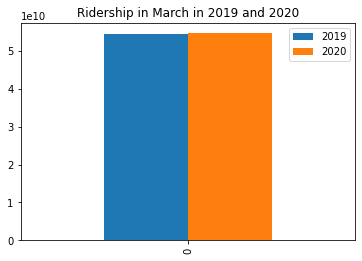

In [38]:
march_chart = march_ridership.plot(kind ="bar", title = "Ridership in March in 2019 and 2020")


In [26]:
march_change = pd.merge(change_2019df, change_2020df, on = "STATION", how = "outer")

march_change.head()

,TOTAL ENTRIES_x,TOTAL ENTRIES_y
STATION,,
1 AV,1.216860e+05,10327.0
103 ST,2.159556e+09,69192362.0
103 ST-CORONA,1.168390e+05,28254.0
104 ST,3.149317e+09,4132779.0
110 ST,6.685300e+04,13161.0


In [28]:
march_change = march_change.rename(columns = {"TOTAL ENTRIES_x": "Total Entries (2019)", "TOTAL ENTRIES_y": "Total Entries (2020)"})
march_change["Percent Change (%)"] = round((march_change["Total Entries (2019)"] - march_change["Total Entries (2020)"])/march_change["Total Entries (2019)"] * 100, 2)
march_change["Percent Change (%)"] = march_change["Percent Change (%)"].map("{:.2f}%".format)

march_change.head()

,Total Entries (2019),Total Entries (2020),Percent Change (%)
STATION,,,
1 AV,1.216860e+05,10327.0,91.51%
103 ST,2.159556e+09,69192362.0,96.80%
103 ST-CORONA,1.168390e+05,28254.0,75.82%
104 ST,3.149317e+09,4132779.0,99.87%
110 ST,6.685300e+04,13161.0,80.31%


In [42]:
station_to_find = "BROADWAY JCT"
march_change = march_change.reset_index()

station_change_df = march_change.loc[march_change["STATION"] == station_to_find]

station_change_df

,STATION,Total Entries (2019),Total Entries (2020),Percent Change (%)
164,BROADWAY JCT,55019.0,18936.0,65.58%


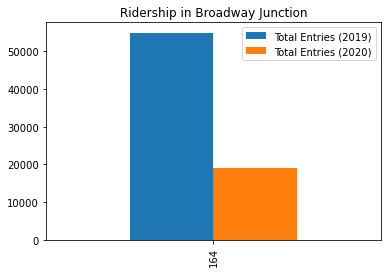

In [43]:
station_chart = station_change_df.plot(kind = "bar", title = "Ridership in Broadway Junction")